In [1]:
# Custom utils
%cd ..
from potsdam_utils import *
%cd test_notebooks

# Image utils
from PIL import Image
from torchvision.transforms import ToPILImage

# Plotting 
import matplotlib.pyplot as plt

# Basic imports
import random

# Torch
from torch.utils.data import DataLoader

/pfs/data5/home/tu/tu_tu/tu_zxmav84/DS_Project/modules/models/segmentation
/pfs/data5/home/tu/tu_tu/tu_zxmav84/DS_Project/modules/models/segmentation/test_notebooks


### Get All files

In [2]:
file_paths = get_file_paths()
print('Example 0 in file paths:')
file_paths[0]

Indexing files in potsdam/Patched... 
Found: 	 342 Images 
	 342 Mask
Example 0 in file paths:


('/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/potsdam/Patched/top_potsdam_2_11_patch_2_2_image.tif',
 '/pfs/work7/workspace/scratch/tu_zxmav84-ds_project/data/potsdam/Patched/top_potsdam_2_11_patch_2_2_mask.tif')

### Visualize one example in file paths:

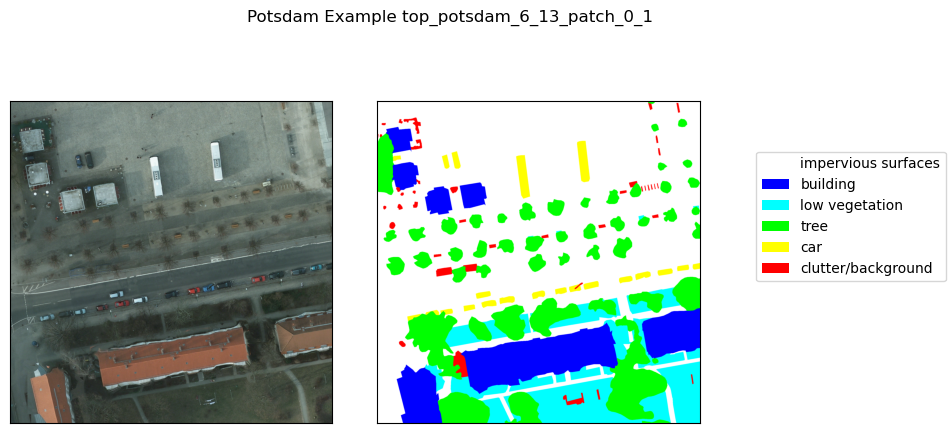

In [3]:
idx = random.randint(0, len(file_paths))
plot_example(Image.open(file_paths[idx][0]),
             Image.open(file_paths[idx][1]), 
             title = f"Potsdam Example {file_paths[idx][0].split('/')[-1].split('_image.tif')[0]}")

### Test mapping from RGB to Label and Back

In [4]:
idx = random.randint(0, len(file_paths))
img = Image.open(file_paths[idx][0])
mask = Image.open(file_paths[idx][1])

In [5]:
# map RGB mask to label
label_mask = map_rgb2label(np.array(mask))
# map back again
rgb_mask = map_label2rgb(label_mask)

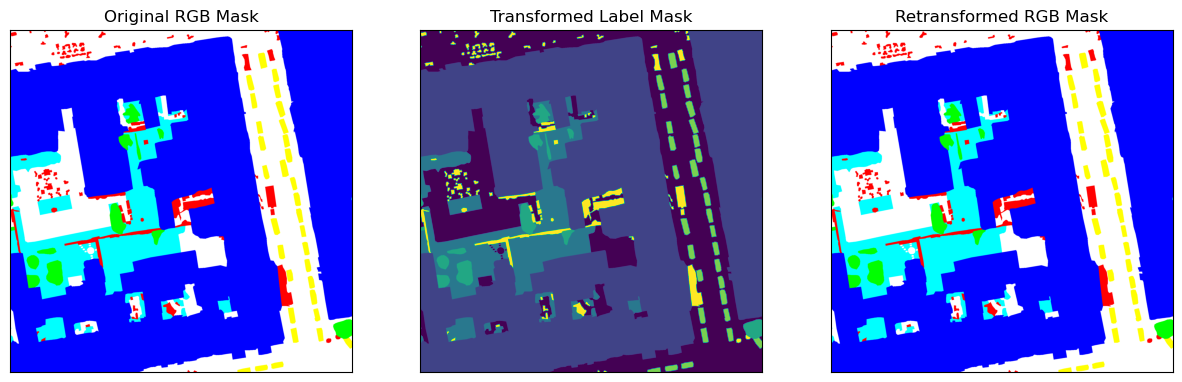

In [6]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].imshow(mask)
ax[0].set_title('Original RGB Mask')
ax[1].imshow(label_mask)
ax[1].set_title('Transformed Label Mask')
ax[2].imshow(rgb_mask)
ax[2].set_title('Retransformed RGB Mask')
[ax[i].get_xaxis().set_ticks([]) for i in range(ax.shape[0])]
[ax[i].get_yaxis().set_ticks([]) for i in range(ax.shape[0])]
plt.show()

### Test Dataset Class and transforms

In [6]:
dataset = PotsdamDataset(file_paths, transform=train_transform)
print(f"Length of Dataset: {len(dataset)}")

Length of Dataset: 333


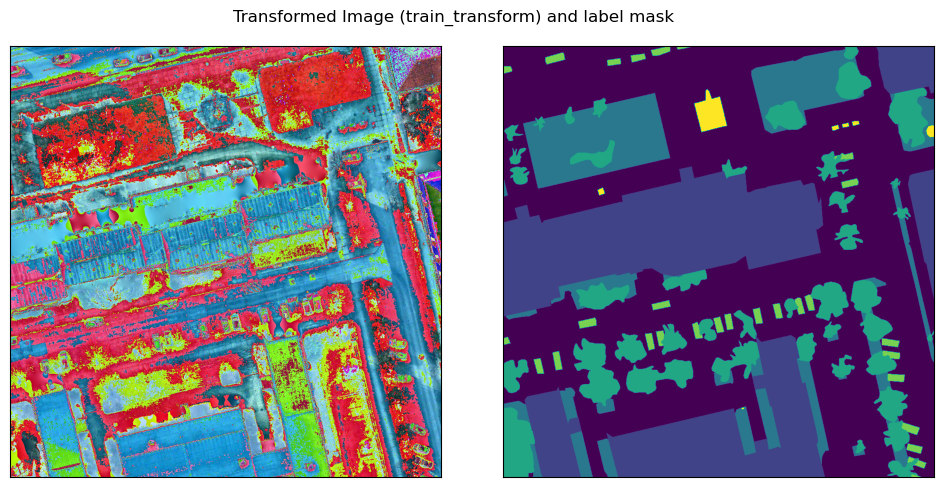

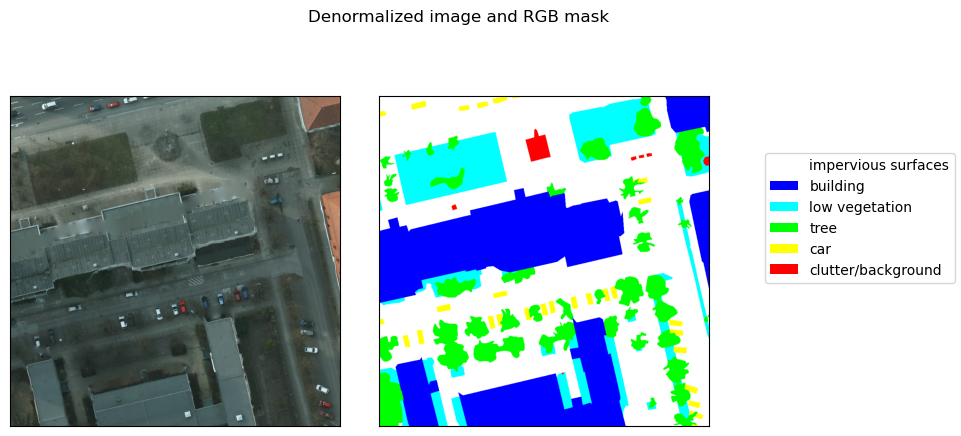

In [8]:
idx = random.randint(0, len(file_paths))
data = dataset[idx]
img = data[0]
mask = data[1]
plot_example(ToPILImage()(img), 
             ToPILImage()(mask), 
             title='Transformed Image (train_transform) and label mask', 
             plot_legend=False)
plot_example(ToPILImage()(denormalize_image(img)), 
             ToPILImage()(map_label2rgb(mask)), 
             title='Denormalized image and RGB mask', 
             plot_legend=True)           

### Train/Test Split and Dataloader

In [7]:
train_dict, test_dict = train_test_split(file_paths, test_size=0.2)

Length of all files: 333
Length of train (266) and test (67): 333


In [8]:
train_loader = DataLoader(PotsdamDataset(train_dict, transform=train_transform), 
                          batch_size = 16)
test_loader = DataLoader(PotsdamDataset(test_dict, transform=test_transform),
                          batch_size=16)

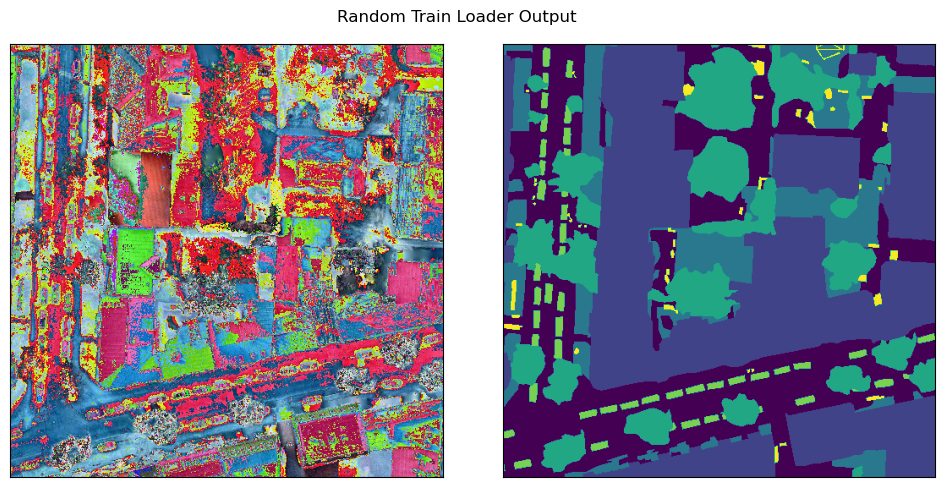

In [9]:
data = next(iter(train_loader))
idx = random.randint(0, data[0].shape[0])
img = data[0][idx]
mask = data[1][idx]
plot_example(ToPILImage()(img), 
             ToPILImage()(mask), 
             title='Random Train Loader Output', 
             plot_legend=False)

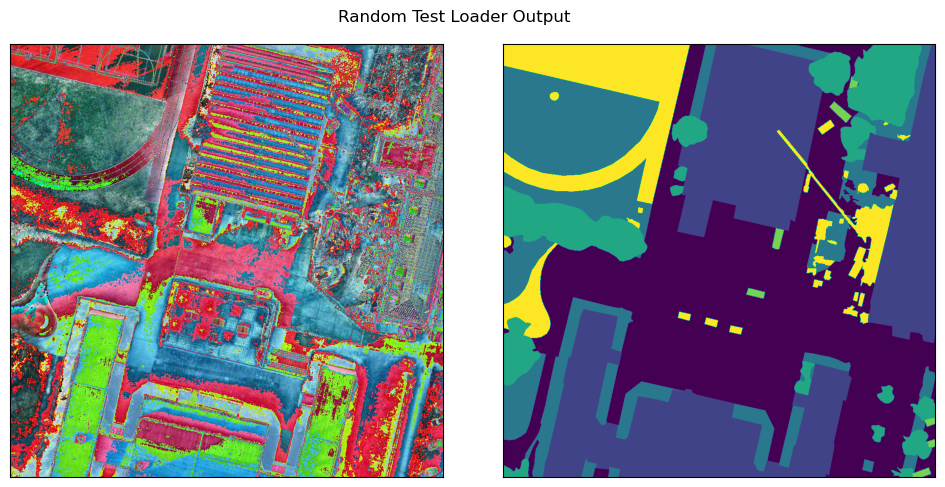

In [12]:
data = next(iter(test_loader))
idx = random.randint(0, data[0].shape[0])
img = data[0][idx]
mask = data[1][idx]
plot_example(ToPILImage()(img), 
             ToPILImage()(mask), 
             title='Random Test Loader Output', 
             plot_legend=False)